In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def train(pr,theta=1e-8):
    V=[]
    pi=[]
    for i in range(0,100):
        V.append(np.random.random()*1000)
        pi.append(0)
    V[0]=0.0
    cnt=0
    while True:
        delta=0.0
        for s in range (1,100):
            old_v=V[s]
            tmp=[0]*101
            for a in range (1,s+1):
                if a+s<100:
                    tmp[a]+=pr*(0+V[s+a])
                    tmp[a]+=(1-pr)*(0+V[s-a])
                if a+s>=100:
                    tmp[a]+=pr*(1+0)
                    tmp[a]+=(1-pr)*(0+V[s-a])
            optimal_a=np.argmax(tmp)
            #print("{},{}".format(op,tmp[op]))
            pi[s]=optimal_a
            V[s]=tmp[optimal_a]
            delta=max(delta,abs(V[s]-old_v))
        cnt+=1
        if cnt%2000==0:
            print("p={}, iterations:{}, loss={}".format(pr,cnt,delta))
        if delta < theta:
            print("p={}, iterations:{}, loss={}".format(pr,cnt,delta))
            break
    return V,pi

In [3]:
x=[]
for i in range(100):
    x.append(i)
V1,p1 = train(0.4)
V2,p2 = train(0.25)
V3,p3 = train(0.55)

p=0.4, iterations:876, loss=2.792053331590605e-09
p=0.25, iterations:181, loss=9.996226007699931e-09
p=0.55, iterations:2000, loss=0.08853326201176515
p=0.55, iterations:4000, loss=0.0031022302549597036
p=0.55, iterations:6000, loss=9.695567173162445e-05
p=0.55, iterations:8000, loss=1.3163518770564764e-06
p=0.55, iterations:9452, loss=9.988810223404698e-09


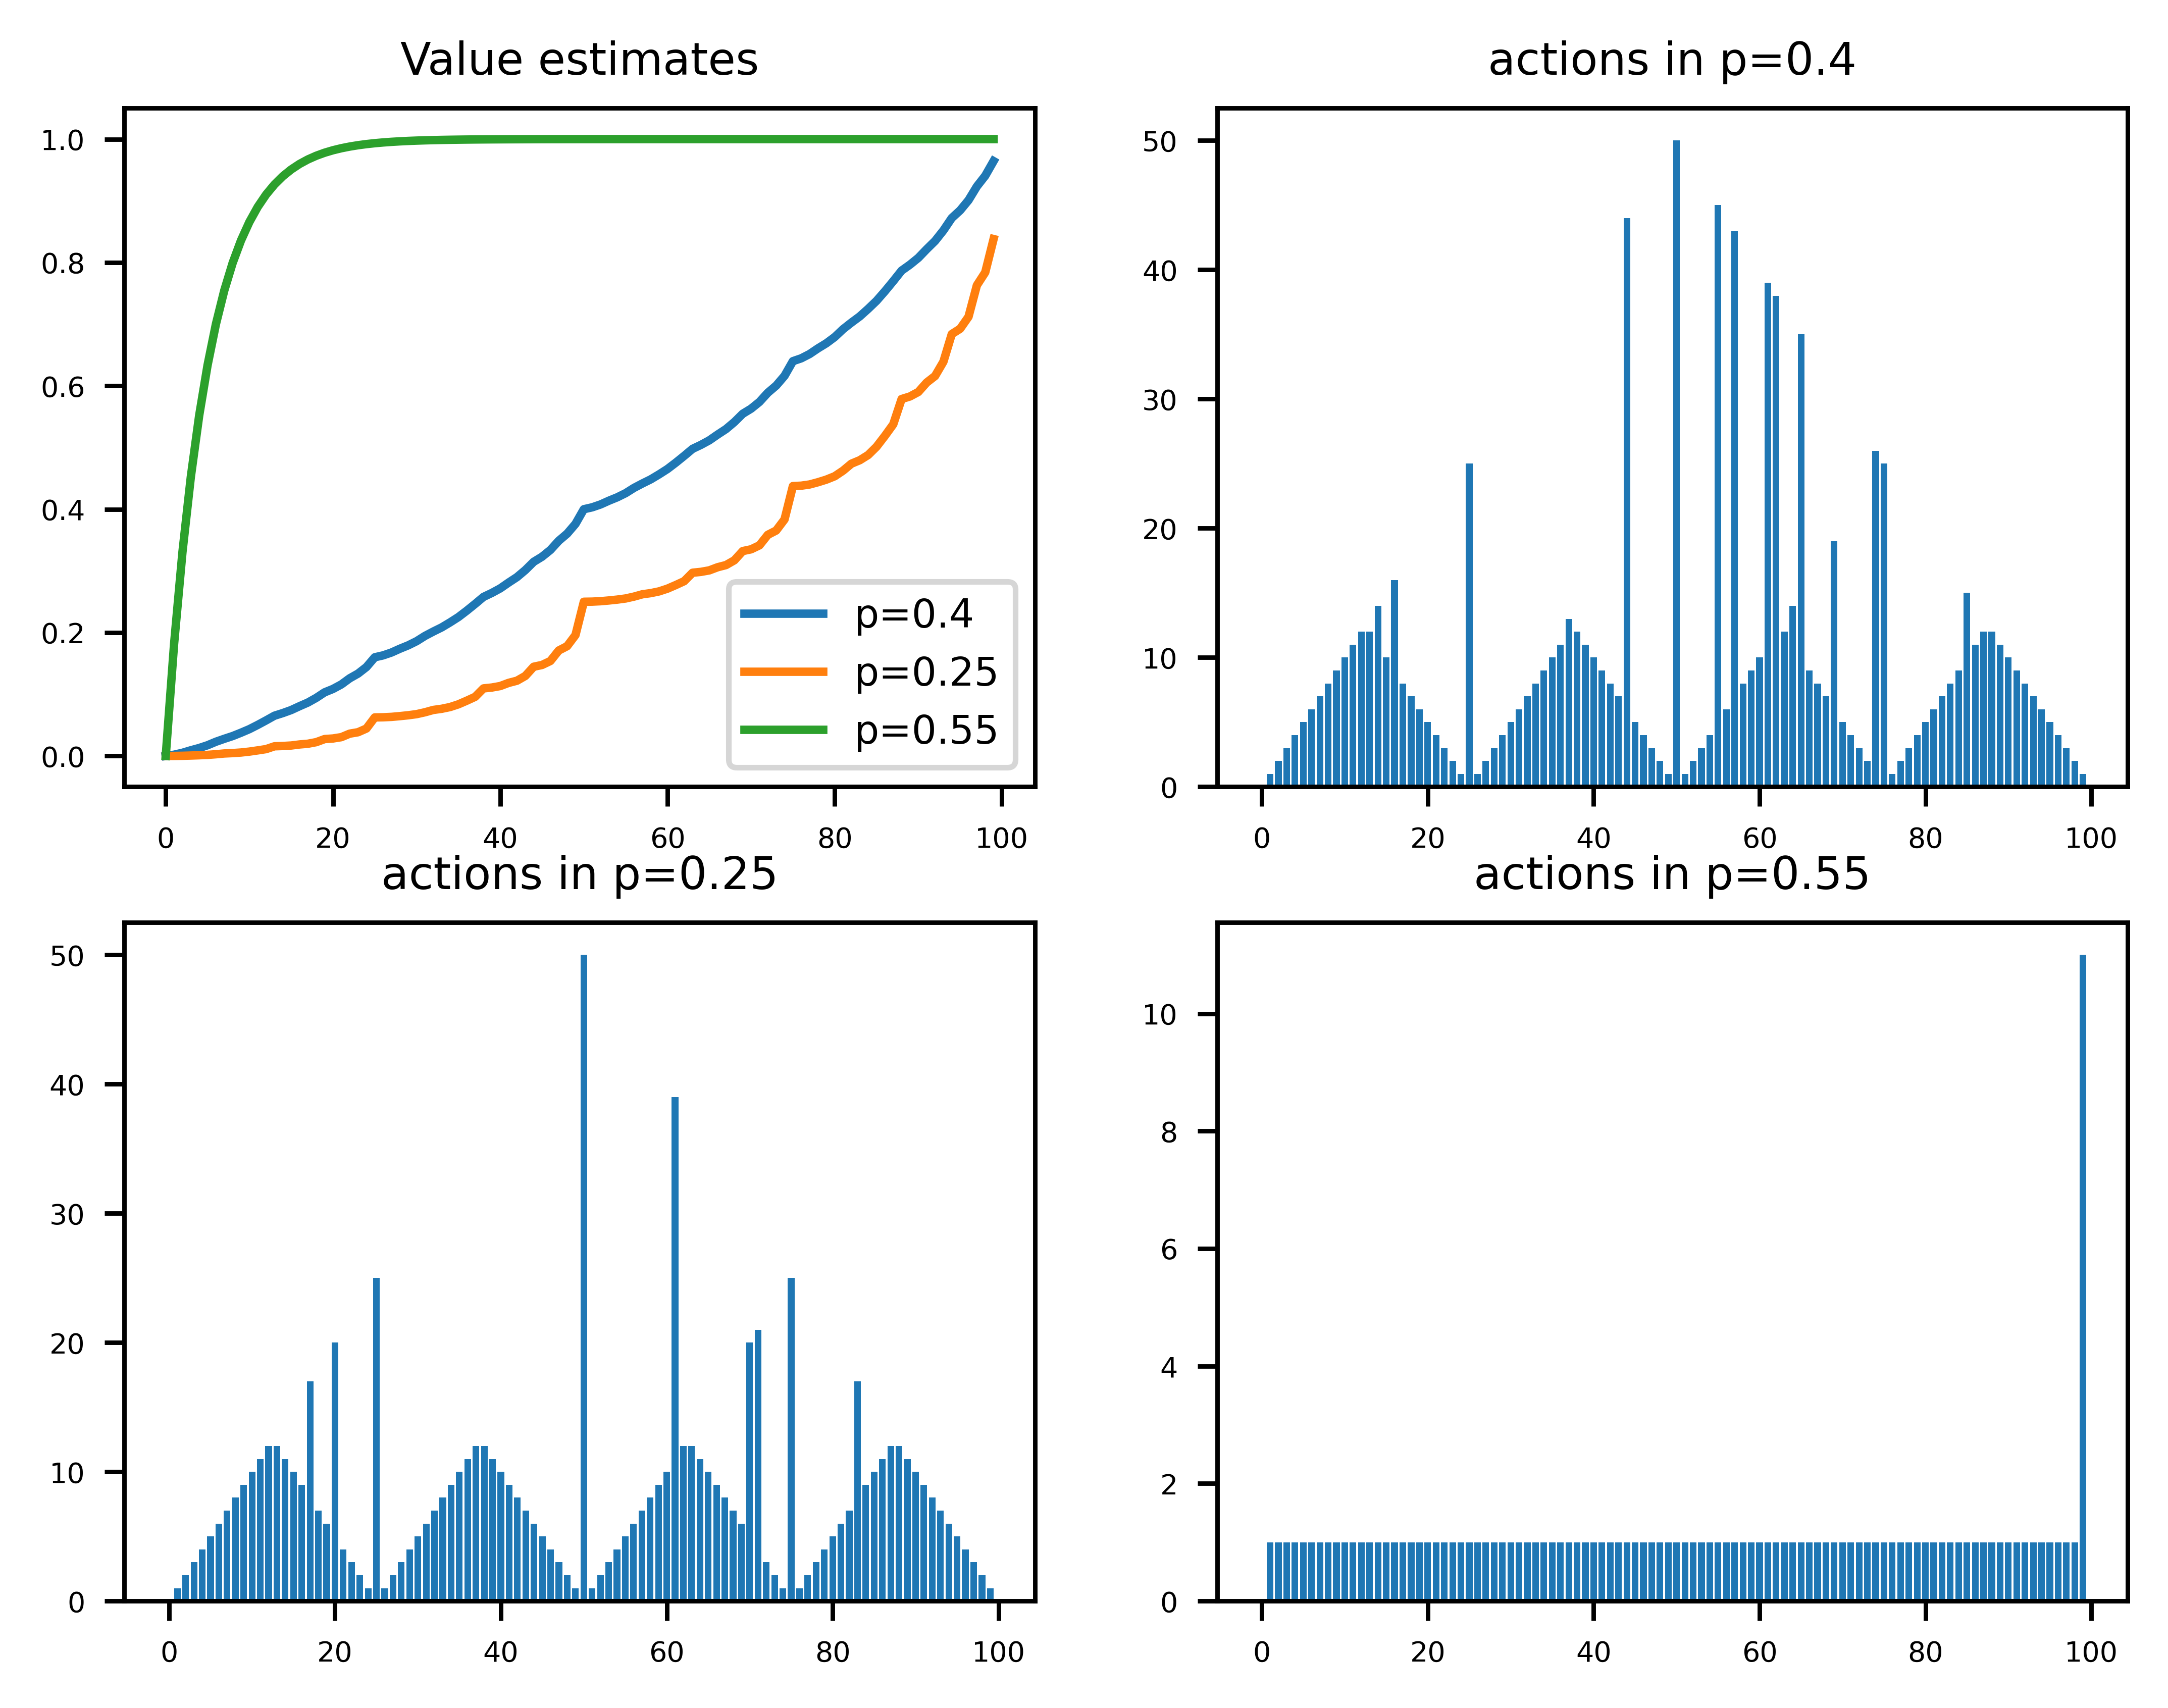

In [17]:
plt.figure(1,dpi=800)
plt.subplot(2,2,1)
plt.plot(x,V1,label='p=0.4')
plt.plot(x,V2,label='p=0.25')
plt.plot(x,V3,label='p=0.55')
plt.title("Value estimates",fontsize=8)
plt.tick_params(labelsize=5) 
plt.legend(loc=4,prop = {'size':7})
plt.subplot(2,2,2)
plt.bar(x,p1)
plt.title("actions in p=0.4",fontsize=8)
plt.tick_params(labelsize=5) 
plt.subplot(2,2,3)
plt.bar(x,p2)
plt.title("actions in p=0.25",fontsize=8)
plt.tick_params(labelsize=5) 
plt.subplot(2,2,4)
plt.bar(x,p3)
plt.title("actions in p=0.55",fontsize=8)
plt.tick_params(labelsize=5) 

In [10]:
V4,p4=train(0.9)

p=0.9, iterations:1088, loss=9.929668642882916e-09


In [11]:
V5,p5=train(0.05)

p=0.05, iterations:26, loss=8.166407957007367e-10


<BarContainer object of 100 artists>

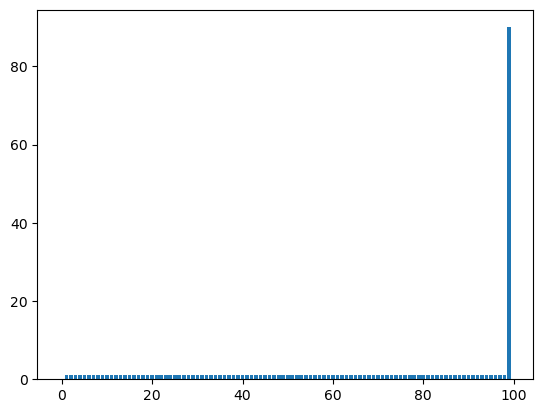

In [13]:
plt.bar(x,p4)

<BarContainer object of 100 artists>

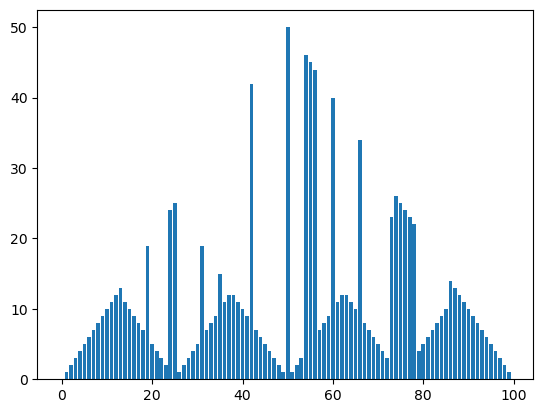

In [14]:
plt.bar(x,p5)